# From the information that it occurs 3 times in 5 years, we estimate how many times a year will occur according to the Poisson distribution.
## P(k times in a year | 3 times in 5 years) = P1(k times in a year | $\lambda$) P0($\lambda$ | 3 times in 5 years)
## So,
## Determine the probability distribution $\lambda$ of the P0($\lambda$ | 3 times in 5 years)
## and
## Caluclate P1(k times in a year | $\lambda$)

In [17]:
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import numpy as np
import pymc3 as pm

itemnum = 1000
with pm.Model() as poisson_model:
    # lamda : initial Prior distribution
    #lamda = pm.Uniform('lambda', lower = 0, upper = 10.0)
    lamda = pm.Exponential('lamda', 1.0)
    p0 = pm.Poisson('p0', mu = 5 * lamda, observed = 3)
    p1 = pm.Poisson('p1', mu = lamda)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(itemnum, step = step, start = start, njobs = 4)

Optimization terminated successfully.
         Current function value: 3.201909
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


100%|██████████| 1000/1000 [00:03<00:00, 347.38it/s]


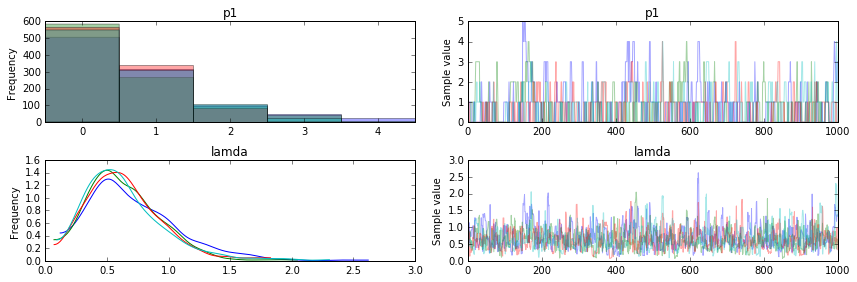

In [18]:
with poisson_model:
    pm.traceplot(trace)

In [19]:
with poisson_model:
    pm.summary(trace)


p1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.643            0.866            0.038            [0.000, 2.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          1.000          3.000


lamda:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.661            0.327            0.010            [0.112, 1.287]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.184          0.431          0.603          0.838          1.458



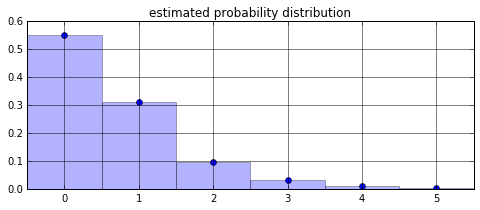

In [20]:
# probability mass function
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def generate_pmf(d):
    hist = np.histogram(d, max(d) - min(d) + 1)
    return (lambda x: (hist[0] / d.size)[x - min(d)])
d = trace['p1']

pmf = generate_pmf(d)
x = np.arange(min(d), max(d) + 1)
plt.rcParams["figure.figsize"] = (8,3)
plt.title('estimated probability distribution')
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(which='major',color='black',linestyle='-')
plt.xlim(x[0] - 0.5, x[-1] + 0.5)
plt.bar(x - 0.5, pmf(x), width=1.0, alpha=0.3)
plt.plot(x, pmf(x), 'o')
plt.show()